# 4. Based on the past data, who will be the most played artist and podcast for 2025?" :question:  

#### Visualize top 10 artists over time

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import textwrap

# load data
music_tracks_df = pd.read_csv('../Cleaned_Data/Music_Streaming_History.csv')
podcast_episodes_df = pd.read_csv('../Cleaned_Data/Podcast_Streaming_History.csv')


# set font to Microsoft YaHei to show Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

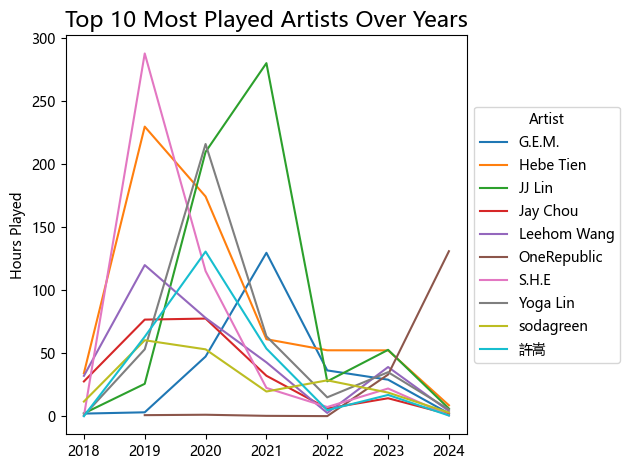

In [4]:
top_artists = music_tracks_df['artist_name'].value_counts().head(10).index.tolist()

# calculate total minutes played for all artists in each year
# group by artist_name and years, summing minutes played
grouped_data =(
    music_tracks_df.groupby(['artist_name','year'])['minutes_played']
    .sum()
    .reset_index()
)

# convert minutes to hours
grouped_data['hours_played']=grouped_data['minutes_played']/60

# only include top 10 artists by count in the grouped data
filtered_data=grouped_data[grouped_data['artist_name'].isin(top_artists)]


# create line chart

sns.lineplot(
    data=filtered_data,
    x='year',
    y='hours_played',
    hue='artist_name',
    palette='tab10',
)

# move legend to right
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title='Artist')

# Add titles and labels
plt.ylabel('Hours Played')
plt.xlabel('')
plt.title('Top 10 Most Played Artists Over Years', fontsize=16)

plt.tight_layout()
plt.show()


#### Visualize top 10 podcasts over time

In [15]:
top_show=podcast_episodes_df['show_name'].value_counts().head(10).index.tolist()

grouped_podcast_data=(
    podcast_episodes_df.groupby(['show_name','year'])['minutes_played']
    .sum()
    .reset_index()
)

# convert minutes to hours
grouped_podcast_data['hours_played']=grouped_podcast_data['minutes_played']/60


# only include top 10 podcast shows in the grouped podcast data
filtered_podcast_data=grouped_podcast_data[grouped_podcast_data['show_name'].isin(top_show)]

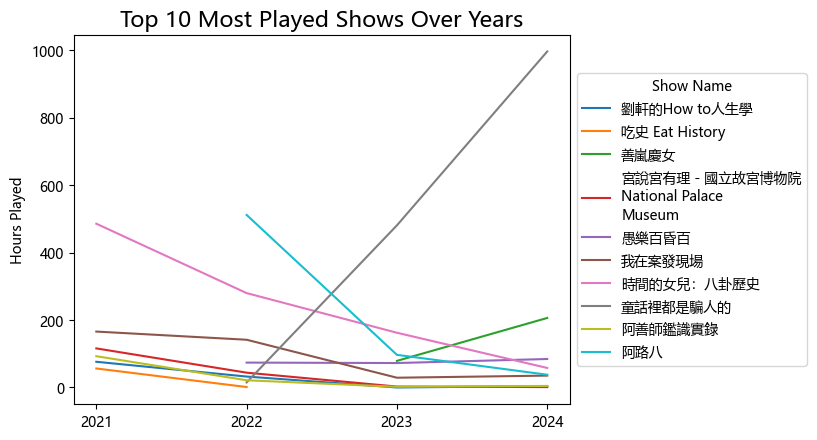

In [20]:
# create line chart
sns.lineplot(
    data=filtered_podcast_data,
    x='year',
    y='hours_played',
    palette='tab10',
    hue='show_name'
)

#set x axis ticks to display discrete years
plt.xticks(
    # use unique years as ticks
    ticks=filtered_podcast_data['year'].unique(),
    # ensure to display as integer
    labels=filtered_podcast_data['year'].unique().astype(int)
)


# move legend to right
legend = plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title='Show Name')

# wrap text in legend
for text in legend.texts:
    text.set_text('\n'.join(textwrap.wrap(text.get_text(),15)))
plt.ylabel('Hours Played')
plt.xlabel('')
plt.title('Top 10 Most Played Shows Over Years', fontsize=16)

plt.show()